In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level 
#interface for drawing attractive and informative statistical graphics

In [6]:
#imort the data
raw_data=pd.read_csv("countries.csv")

In [5]:
raw_data.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


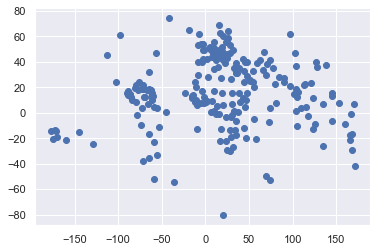

In [8]:
#scatter plot and to view the scatter plot scatter(x, y)
plt.scatter(raw_data['Longitude'],raw_data['Latitude'])

In [7]:
new_data_frame=raw_data.iloc[:,1:4]

In [9]:
#DataFrame.iloc[<range>] method should be passed with the range
new_data_frame.head()

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450


In [10]:
#Clustering
#initialize clustering
kmeans = KMeans(2)

In [12]:
#e fit methods to 
#perform the clustering as show
kmeans.fit(new_data_frame)

KMeans(n_clusters=2)

In [13]:
#extract the results
identified_clusters = kmeans.fit_predict(new_data_frame)

In [14]:
identified_clusters

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1])

In [16]:
len(identified_clusters)

241

In [17]:
#Clustering results
#copy of an exisiting data frame
contry_cluseter=raw_data.copy()

In [18]:
#new data frame and observe how each country is allocated to different clusters.
contry_cluseter['clusterNo']=identified_clusters

In [19]:
contry_cluseter

,name,Longitude,Latitude,clusterNo
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,1
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,1
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,0
237,Yemen,47.586762,15.909280,1
238,South Africa,25.083901,-29.000341,1
239,Zambia,27.774759,-13.458242,1


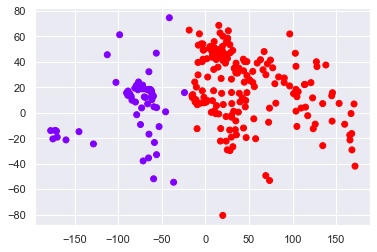

In [21]:
#Plot the data in the new data frame (the one with clusterNo) on a scatter plot again, this time 
#with colors assigned to each cluster. This could be done by adding a third parameter 
#c=<column based on which the spots to be colored>. In this case, we want our points to be 
#colored based on the clusterNo column. Add a forth parameter cmap='rainbow' to view the 
#graph in more attractive colors
plt.scatter(contry_cluseter['Longitude'],contry_cluseter['Latitude'],c=contry_cluseter['clusterNo'],cmap='rainbow')

In [23]:
#Obtaining the optimal number of clusters
#generate WCSS for different number of clusters with same data in our data frame
wcss=[]
for i in range(1 , 20):
    kmeans = KMeans(i)
    kmeans.fit(new_data_frame)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [24]:
wcss

[1413859.6798344278,
 657012.0797586322,
 325235.522370559,
 256573.08675934304,
 195011.36281389272,
 151428.48761967375,
 127675.68707663211,
 103042.5359400676,
 85043.05667922426,
 76439.4964481882,
 70138.19769696041,
 63467.38052277539,
 59854.87383566725,
 53871.687968306855,
 50974.52264402988,
 47751.86712135806,
 43716.89966593517,
 42702.27058967441,
 39109.39307148002]

Text(0, 0.5, 'Within-cluster Sum of Squares')

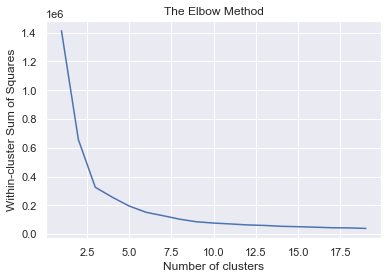

In [25]:
#Now plot the WCSS values you have obtained
number_clusters = range(1,20)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')